<a href="https://colab.research.google.com/github/Gihgithub/DATA606_HW6/blob/main/DATA606_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows


In [ ]:
url = 'https://raw.githubusercontent.com/Gihgithub/DATA606_HW6/main/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
y = df['Outcome'].values
X = df.drop('Outcome', axis=1).values


## USe LogisticRegression to fit the data and print out the intercept and the coefficients

In [ ]:
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# Create the classifier: logreg
logreg = LogisticRegression()

In [ ]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("The Intercept is :", logreg.intercept_)
print("The Coefficients are :", logreg.coef_)

The Intercept is : [-0.88612313]
The Coefficients are : [[ 0.21255833  1.07113231 -0.24784154  0.04569683 -0.2008266   0.77815151
   0.23060673  0.42100175]]


In [ ]:
## 2 points
diab_df=df
## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40381811), 'w1': array(0.12319259), 'w2': array(0.03516101), 'w3': array(-0.01329351), 'w4': array(0.00062072), 'w5': array(-0.00119151), 'w6': array(0.08968112), 'w7': array(0.94539065), 'w8': array(0.0148632)}


The code is a Bayesian logistic regression model. 

The coefficients for each variables is generated from from a normal distribution with a mean of 0 and a standard deviation of 100 (Normal (mu=0, sd=100). 
A base model is defined using each of the independent variables in the dataframe split (The X data frame contain the Independent variables of the diabetics dataframe) and the coefficients defined by the normal distributions.

Then the outcome variable is specified as a Bernoulli distribution (The result can obly be "Has Diabetics" or "Does Not Have Diabetic" represented with "1" and "0" respectively). 
Using the pymc3 function for the posterior, it finds the mode of the posterior distribution and point estimates for each of the parameters given by the values of 'W0', 'w1', .......

In [ ]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    # Getting the starting values
    startvals = pm.find_MAP(model = logreg_model)
  
    # draw 5000 posterior samples
    trace = pm.sample(800, step=pm.Metropolis(), start=startvals)
   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 2 chains for 1_000 tune and 800 draw iterations (2_000 + 1_600 draws total) took 24 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b932ed4d0>,
      dtype=object)

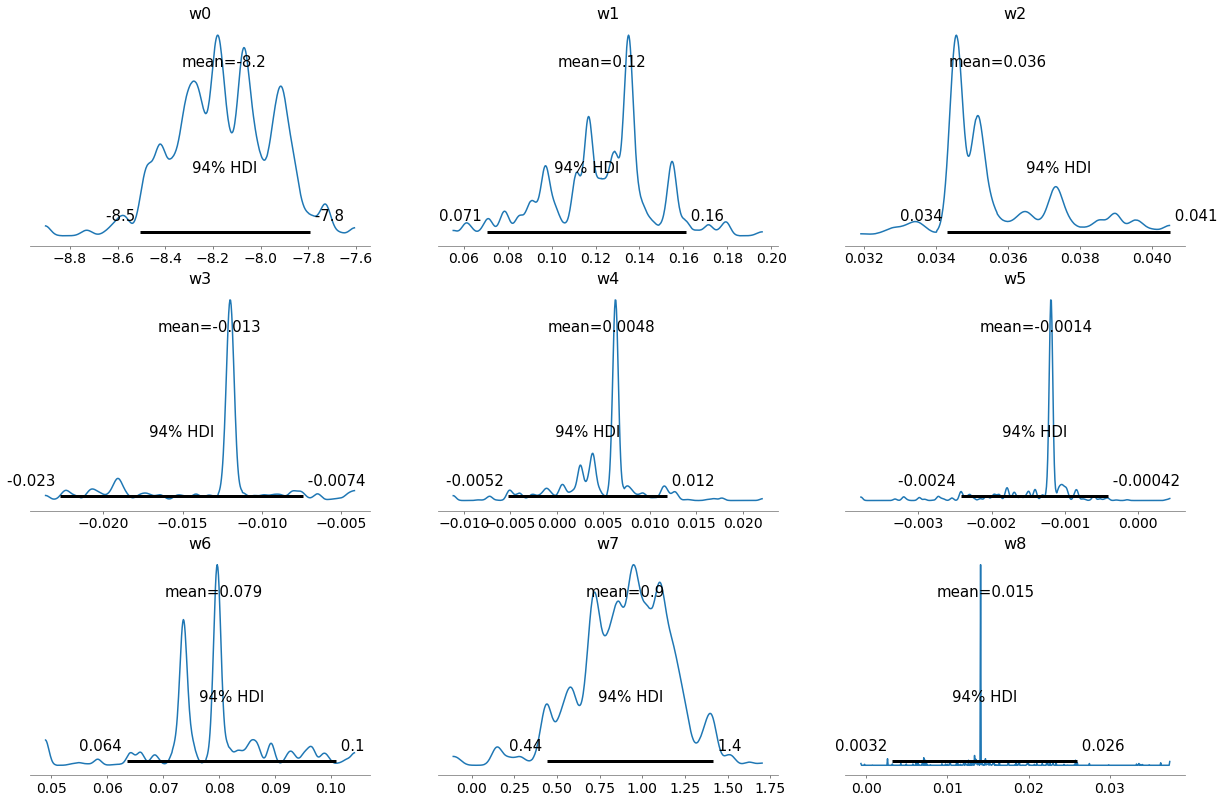

In [ ]:
## Explain the output of the plot 
az.plot_posterior(trace)

The output is the distribution of the estimates taken from the logreg model using the Metropolis algorithm from pymc3